<a href="https://colab.research.google.com/github/ThinhdanghocDE/BTL-AI/blob/main/BTL_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install hvplot


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.3/170.3 kB 3.6 MB/s eta 0:00:00


In [2]:
pip install ml-dtypes==0.5.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 34.7 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires ml-dtypes<0.5.0,>=0.4.0, but you have ml-dtypes 0.5.1 which is incompatible.


In [3]:
pip install tensorboard==2.19.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 39.1 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.18.0
    Uninstalling tensorboard-2.18.0:
      Successfully uninstalled tensorboard-2.18.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires ml-dtypes<0.5.0,>=0.4.0, but you have ml-dtypes 0.5.1 which is incompatible.
tensorflow 2.18.0 requires tensorboard<2.19,>=2.18, but you have tensorboard 2.19.0 which is incompatible.


In [4]:
pip install tensorflow==2.19.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 2.0 MB/s eta 0:00:00
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.18.0
    Uninstalling tensorflow-2.18.0:
      Successfully uninstalled tensorflow-2.18.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.18.0 requires tensorflow<2.19,>=2.18, but you have tensorflow 2.19.0 which is incompatible.
tensorflow-decision-forests 1.11.0 requires tensorflow==2.18.0, but you have tensorflow 2.19.0 which is incompatible.
tensorflow-text 2.18.1 requires tensorflow<2.19,>=2.18.0, but you have tensorflow 2.19.0 which is incompatible.


In [5]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import statistics
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
from sklearn import preprocessing
import itertools
from sklearn.model_selection import validation_curve
from xgboost import XGBClassifier
import xgboost as xgb
from xgboost import plot_importance
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import GradientBoostingClassifier
import hvplot.pandas
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder

#**PHÂN TÍCH BỘ DỮ LIỆU GỐC**

##*Đọc dữ liệu*

In [36]:
df=pd.read_csv(r"/content/Goc.csv")
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
9,28,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes


##*a) Biểu đồ tần suất của biến mục tiêu deposit*

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

# Vẽ biểu đồ đếm cho biến 'deposit'
plt.figure(figsize=(8, 8))
ax = sns.countplot(
    x='deposit',
    data=df,
    hue='deposit',
    palette=['#5A9BD5', '#ED7D31'],
    order=['no', 'yes'],
    legend=False
)

# Thêm tiêu đề và nhãn
plt.title('Phân bố khách hàng có gửi tiền (Deposit)', fontsize=16)
plt.xlabel('Khách hàng có gửi tiền không?', fontsize=12)
plt.ylabel('Số lượng', fontsize=12)

# Hiển thị số lượng và phần trăm BÊN TRONG cột
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width()/2.,
        height * 0.5,  # Giữa cột
        f'{int(height)}\n({height/len(df)*100:.1f}%)',
        ha="center", va='center',
        fontsize=11, color='white', weight='bold'
    )

plt.show()


Biểu đồ "Tần suất của biến mục tiêu **deposit**" được sử dụng để đánh giá sự phân bố giữa các lớp dữ liệu, ở đây cụ thể là khách hàng có gửi tiền tiết kiệm hay không. Kết quả phân tích chỉ ra rằng bộ dữ liệu có sự cân bằng cao giữa hai lớp quyết định của khách hàng.

Cụ thể: Có 5.873 mẫu thuộc lớp "Không gửi tiền" (chiếm 52.6%) và 5.289 mẫu thuộc lớp "Gửi tiền" (chiếm 47.4%).

Kết luận: Sự cân bằng gần như 1:1 giữa hai lớp là một điều kiện lý tưởng để huấn luyện mô hình dự đoán. Điều này giúp giảm nguy cơ thiên lệch (bias) về phía nhóm chiếm đa số – một vấn đề thường gây khó khăn trong các bài toán phân loại. Nhờ đó, mô hình có thể học được đặc trưng của cả hai nhóm một cách khách quan hơn, từ đó nâng cao độ chính xác và tính khái quát khi áp dụng vào dữ liệu thực tế.

## *b) Biểu đồ Tỷ lệ gửi tiền theo Nghề nghiệp*

In [ ]:
plt.figure(figsize=(12, 8))

# Tạo bảng chéo
job_crosstab = pd.crosstab(df['job'], df['deposit'])
job_crosstab_pct = job_crosstab.div(job_crosstab.sum(axis=1), axis=0)

# Sắp xếp theo tỷ lệ 'yes' giảm dần
job_crosstab_pct_sorted = job_crosstab_pct.sort_values(by='yes', ascending=False)

# Vẽ biểu đồ stacked bar
ax = job_crosstab_pct_sorted.plot(kind='barh', stacked=True, figsize=(12, 8), color=['#5A9BD5', '#ED7D31'])

plt.title('Tỷ lệ Gửi tiền theo Nghề nghiệp', fontsize=16)
plt.xlabel('Tỷ lệ', fontsize=12)
plt.ylabel('Nghề nghiệp', fontsize=12)
plt.legend(title='Gửi tiền', labels=['Không', 'Có'])

# Thêm giá trị phần trăm lên từng thanh
for i, (index, row) in enumerate(job_crosstab_pct_sorted.iterrows()):
    left = 0  # vị trí bắt đầu của phần bar màu đầu tiên
    for j, col in enumerate(job_crosstab_pct_sorted.columns):
        width = row[col]
        if width > 0.01:  # chỉ hiện giá trị nếu phần trăm > 1%
            ax.text(left + width / 2, i, f'{width:.1%}', ha='center', va='center', color='white', fontsize=10)
        left += width

plt.show()


Phân tích biểu đồ cho thấy có một mối liên hệ rõ nét giữa nghề nghiệp của khách hàng và khả năng họ đăng ký sản phẩm tiền gửi. Cụ thể, nhóm "Sinh viên", "Đã nghỉ hưu" và "Thất nghiệp" có tỷ lệ gửi tiền cao nhất trong tất cả các nghề nghiệp được khảo sát. Ngược lại, những khách hàng làm "Công nhân" và trong ngành "Dịch vụ" lại có tỷ lệ đăng ký thấp hơn hẳn so với mức trung bình.

Điều này cho thấy nghề nghiệp là một yếu tố quan trọng giúp phân khúc khách hàng hiệu quả. Dựa trên kết quả này, các chiến dịch marketing nên tập trung nhiều hơn vào những nhóm có tỷ lệ chuyển đổi cao để tận dụng tối đa nguồn lực và nâng cao hiệu quả kinh doanh.



## *c) Phân tích ảnh hưởng của Tuổi (age) và Thời gian cuộc gọi (duration)*

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 10))

# Biểu đồ hộp cho Tuổi và Gửi tiền
sns.boxplot(x='deposit', y='age', data=df, ax=axes[0], hue = 'deposit', palette=['#5A9BD5', '#ED7D31'], order=['no', 'yes'])
axes[0].set_title('Phân bố Tuổi theo Kết quả Gửi tiền', fontsize=14)
axes[0].set_xlabel('Có gửi tiền không?', fontsize=12)
axes[0].set_ylabel('Tuổi', fontsize=12)

# Biểu đồ hộp cho Thời gian cuộc gọi và Gửi tiền
sns.boxplot(x='deposit', y='duration', data=df, ax=axes[1], hue = 'deposit', palette=['#5A9BD5', '#ED7D31'], order=['no', 'yes'])
axes[1].set_title('Phân bố Thời gian Cuộc gọi theo Kết quả Gửi tiền', fontsize=14)
axes[1].set_xlabel('Có gửi tiền không?', fontsize=12)
axes[1].set_ylabel('Thời gian cuộc gọi (giây)', fontsize=12)

plt.tight_layout()
plt.show()

Biểu đồ hộp được dùng để so sánh phân bố của các biến số liên tục là age và duration giữa hai nhóm quyết định "Gửi tiền" và "Không gửi tiền".

Về Tuổi (age): Phân tích cho thấy không có sự khác biệt đáng kể về độ tuổi trung vị (median) giữa hai nhóm khách hàng. Điều này ngụ ý rằng tuổi tác không phải là một yếu tố mang tính quyết định hay phân biệt rõ ràng trong việc đăng ký sản phẩm tiền gửi của ngân hàng trong tập dữ liệu này.

Về Thời gian cuộc gọi (duration): Trái ngược với tuổi, thời gian cuộc gọi thể hiện một sự khác biệt mang ý nghĩa thống kê sâu sắc. Nhóm khách hàng quyết định gửi tiền có thời gian đàm thoại (cả giá trị trung vị và khoảng phân vị) cao hơn hẳn so với nhóm từ chối.

Kết luận: Thời gian cuộc gọi là một biến dự báo rất quan trọng, có thể phản ánh trực tiếp mức độ quan tâm và sự tương tác tích cực của khách hàng đối với sản phẩm được tư vấn. Trong khi đó, yếu tố tuổi tác lại có ảnh hưởng không đáng kể.

## *d) Biểu đồ so sánh thang đo các biến số*

In [ ]:
# Chọn các cột dữ liệu dạng số để vẽ biểu đồ
numerical_cols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
df_numerical = df[numerical_cols]

# Vẽ biểu đồ
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_numerical, palette='viridis')
plt.title('So sánh Thang đo giữa các Biến số', fontsize=16)
plt.ylabel('Giá trị', fontsize=12)
plt.xlabel('Các biến số', fontsize=12)
plt.show()

Biểu đồ trên mang lại một cái nhìn trực quan và rõ ràng về vấn đề khác biệt thang đo giữa các biến trong tập dữ liệu.

1. Sự thống trị của biến balance
Biến balance (số dư tài khoản) có phạm vi giá trị và độ biến thiên (variance) lớn vượt trội so với các biến còn lại. Thang đo của nó lên tới hàng nghìn, trong khi hầu hết các biến khác chỉ dao động trong khoảng hàng chục hoặc hàng trăm. Điều này khiến cho biểu đồ hộp (box plot) của các biến còn lại gần như bị "nén xuống", rất khó quan sát chi tiết.

2. Sự chênh lệch giữa các biến
Ngay cả khi loại bỏ balance khỏi biểu đồ, chúng ta vẫn thấy sự khác biệt đáng kể về thang đo giữa các biến. Chẳng hạn, duration (thời gian cuộc gọi) thường có giá trị lên tới hàng trăm giây, trong khi age (tuổi) chủ yếu nằm ở mức vài chục, và các biến như campaign hay previous thường chỉ là những con số nhỏ (dưới 10).

3. Vì sao đây là vấn đề nghiêm trọng?
Với những mô hình nhạy cảm với khoảng cách như Mạng nơ-ron nhân tạo (ANN), sự khác biệt về thang đo này có thể gây hiểu nhầm nghiêm trọng. Chẳng hạn, một thay đổi nhỏ trong balance sẽ được mô hình coi là quan trọng hơn nhiều so với một thay đổi lớn trong age hay campaign, chỉ vì giá trị tuyệt đối của nó lớn hơn. Điều này không phản ánh đúng bản chất của dữ liệu và có thể khiến mô hình học sai lệch, dẫn đến kết quả không ổn định và kém chính xác.

KẾT LUẬN: Biểu đồ đã chỉ ra rất rõ rằng Chuẩn hóa dữ liệu (Data Scaling) là một bước bắt buộc trong quá trình tiền xử lý, đặc biệt khi áp dụng các mô hình học sâu như ANN. Đây không phải là một lựa chọn tùy ý, mà là điều kiện tiên quyết để đảm bảo mô hình có thể học một cách công bằng và hiệu quả từ tất cả các đặc trưng đầu vào.


## *e) So ánh tần xuất của các thuộc tính*

In [ ]:
df_yes = df[df['deposit'] == 'yes']
df_no = df[df['deposit'] == 'no']
# Vẽ histogram cho nhóm 'yes'
plt.figure(figsize=(12, 12))
df_yes.hist(figsize=(12, 12))
plt.suptitle("Tần suất các thuộc tính với khách hàng gửi tiền (deposit = yes)", fontsize=16)
plt.show()

In [ ]:
# Vẽ histogram cho nhóm 'yes'
plt.figure(figsize=(12, 12))
df_no.hist(figsize=(12, 12))
plt.suptitle("Tần suất các thuộc tính với khách hàng gửi tiền (deposit = no)", fontsize=16)
plt.show()

####Nhận xét về 2 biểu đồ với deposit(yes/no):
 1. Age (Tuổi)
Cả hai nhóm khách hàng gửi tiền (yes) và không gửi tiền (no) đều tập trung nhiều trong độ tuổi 30–40. Tuy nhiên, nhóm gửi tiền có độ tuổi phân bố rộng hơn, đặc biệt xuất hiện nhiều hơn ở các nhóm tuổi từ 50 trở lên. Điều này cho thấy người lớn tuổi hơn có xu hướng gửi tiền cao hơn, có thể do họ có sự ổn định tài chính và nhu cầu tiết kiệm lớn hơn.
 2. Balance (Số dư tài khoản)
Cả hai nhóm đều có phần lớn khách hàng với số dư thấp. Tuy vậy, ở nhóm gửi tiền, có một số lượng đáng kể khách hàng có số dư cao hơn rất nhiều, lên đến hàng chục nghìn. Điều này cho thấy những khách hàng có số dư tài khoản cao thường có khả năng gửi tiền cao hơn – đây là một chỉ báo tài chính quan trọng cần được đưa vào mô hình dự đoán.
 3. Day (Ngày gọi)
Phân bố ngày gọi trong tháng ở hai nhóm gần như giống nhau và khá đồng đều. Không có sự khác biệt rõ rệt giữa khách hàng gửi và không gửi tiền theo ngày gọi. Vì vậy, thuộc tính này có thể ít tác động đến quyết định gửi tiền, hoặc không phải là yếu tố chính.
 4. Month (Tháng gọi)
Ở nhóm không gửi tiền, số lượng khách hàng tập trung rất nhiều trong tháng 5, cho thấy đây có thể là tháng chiến dịch gọi diễn ra mạnh nhưng không hiệu quả. Ngược lại, nhóm gửi tiền có phân bố đều hơn ở các tháng khác, như tháng 8 và 10. Điều này gợi ý rằng tháng gọi ảnh hưởng đến hiệu quả chiến dịch, và cần cân nhắc lại chiến lược tiếp cận trong từng thời điểm cụ thể.
 5. Duration (Thời lượng cuộc gọi)
Đây là một trong những thuộc tính thể hiện sự khác biệt rõ rệt nhất. Nhóm gửi tiền có nhiều cuộc gọi kéo dài hơn, trong khi nhóm không gửi chủ yếu là những cuộc gọi rất ngắn. Có thể thấy rằng thời lượng cuộc gọi càng dài thì khả năng thuyết phục khách hàng gửi tiền càng cao, do đó đây là yếu tố rất quan trọng để đưa vào mô hình AI.
 6. Campaign (Số lần liên hệ trong chiến dịch)
Khách hàng gửi tiền thường chỉ được liên hệ 1–2 lần, trong khi nhóm không gửi có nhiều người bị gọi nhiều hơn, thậm chí tới hơn 10 lần. Việc liên hệ quá nhiều có thể tạo cảm giác làm phiền, phản tác dụng. Do đó, số lần gọi hợp lý sẽ nâng cao hiệu quả chiến dịch.
 7. Pdays (Số ngày kể từ lần gọi trước)
Nhóm gửi tiền có phân bố rộng hơn ở thuộc tính pdays, nghĩa là họ đã từng được gọi trước đây và khoảng thời gian giữa các lần gọi không quá xa. Trong khi đó, nhóm không gửi chủ yếu có giá trị pdays cao hoặc đặc biệt (999), tức là chưa từng được gọi. Khách hàng đã từng được chăm sóc trước đó có xu hướng gửi tiền cao hơn, nên đây cũng là một chỉ báo tốt.
 8. Previous (Số lần liên hệ trước chiến dịch hiện tại)
Tương tự như pdays, nhóm gửi tiền có xu hướng đã từng được tiếp cận trong quá khứ. Nhóm không gửi tiền phần lớn chưa từng được liên hệ. Điều này tiếp tục khẳng định rằng lịch sử chăm sóc khách hàng là một yếu tố quan trọng giúp nâng cao tỷ lệ gửi tiền.



## *f) Ma trận tương quan giữa các biến số*

In [ ]:
# Thêm cột mục tiêu đã được mã hóa vào để phân tích tương quan
# Điều này giúp ta thấy biến số nào có ảnh hưởng mạnh nhất đến kết quả
numeric_data['deposit'] = df['deposit'].map({'yes': 1, 'no': 0})

# Tính toán ma trận tương quan
corr_numeric = numeric_data.corr()

# Vẽ biểu đồ heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_numeric, annot=True, fmt='.2f', cmap='RdBu_r', cbar=True)
plt.title("Ma trận Tương quan giữa các Biến số và Biến mục tiêu", fontsize=16)
plt.show()

Dựa vào ma trận tương quan, ta thấy rằng biến có ảnh hưởng mạnh nhất đến quyết định gửi tiền của khách hàng là thời lượng cuộc gọi (duration), với hệ số tương quan khá cao (0.45). Điều này hoàn toàn hợp lý vì những cuộc gọi dài thường thể hiện mức độ quan tâm hoặc sự thuyết phục thành công từ phía nhân viên tư vấn. Ngoài ra, các biến liên quan đến lịch sử tương tác như pdays và previous cũng cho thấy mối liên hệ tích cực với hành vi gửi tiền – nghĩa là nếu khách hàng từng được liên hệ trước đó, họ có xu hướng dễ đồng ý hơn. Ngược lại, biến campaign lại có tương quan âm, cho thấy việc gọi quá nhiều lần trong cùng một chiến dịch có thể gây phản tác dụng, khiến khách hàng cảm thấy phiền và từ chối. Những yếu tố như tuổi (age) hay số dư tài khoản (balance) có vẻ không ảnh hưởng nhiều, vì mức tương quan với biến mục tiêu là rất nhỏ. Tóm lại, nếu muốn xây dựng một mô hình dự đoán hiệu quả, ta nên tập trung vào những yếu tố thể hiện mức độ tương tác và hiệu quả của cuộc gọi hơn là thông tin cá nhân đơn thuần.

## *g) Nhận xét bộ dữ liệu gốc*

###I. Điểm Tốt (Có thể giữ lại hoặc sử dụng trực tiếp)

Sự Cân Bằng của Biến Mục Tiêu (deposit):

- Hiện trạng: Tỷ lệ giữa lớp "Gửi tiền" (47.4%) và "Không gửi tiền" (52.6%) gần như là 1:1.
- Đánh giá: Đây là ưu điểm lớn nhất của bộ dữ liệu. Nó cho phép chúng ta xây dựng mô hình mà không cần áp dụng các kỹ thuật xử lý mất cân bằng phức tạp (như SMOTE hay điều chỉnh trọng số lớp). Mô hình sẽ học được đặc điểm của cả hai lớp một cách công bằng, và các chỉ số đánh giá như độ chính xác (accuracy) sẽ trở nên đáng tin cậy hơn.

Tính Hoàn Chỉnh của Dữ liệu (Không có giá trị thiếu):

- Hiện trạng: Bộ dữ liệu không chứa các ô giá trị bị bỏ trống (null/NaN).
- Đánh giá: Điều này giúp chúng ta tiết kiệm được một bước xử lý dữ liệu phức tạp là điền giá trị thiếu (imputation). Dữ liệu sạch và đầy đủ cho phép chúng ta tiến thẳng đến các bước xử lý quan trọng hơn.


###II. Điểm Cần Cải Thiện (Yêu cầu Tiền xử lý)

Sự tồn tại của Dữ liệu dạng Chuỗi (Categorical Data):

- Hiện trạng: Rất nhiều cột quan trọng đang ở định dạng văn bản, không phải dạng số. Ví dụ: job, marital, education, contact, poutcome, month. Các cột nhị phân như default, housing, loan, deposit cũng đang là 'yes'/'no'.
- Vấn đề: Mô hình ANN chỉ có thể xử lý các con số. Nó không hiểu được giá trị "management" hay "married" có ý nghĩa gì.

Giải pháp tiền xử lý:

- Mã hóa One-Hot (One-Hot Encoding): Đối với các cột có nhiều hơn hai loại giá trị (ví dụ: job, education), chúng ta cần chuyển mỗi giá trị thành một cột nhị phân (0/1) riêng biệt.
- Mã hóa Nhị phân (Binary Encoding): Đối với các cột chỉ có hai giá trị 'yes'/'no' (ví dụ: housing, loan, và chính cột deposit), chúng ta sẽ chuyển đổi chúng thành 0 và 1.

Sự khác biệt về Thang đo giữa các Biến số:
- Hiện trạng: Các cột số có đơn vị và khoảng giá trị rất khác nhau. Ví dụ, balance (số dư tài khoản) có thể lên tới hàng chục nghìn, trong khi campaign (số lần liên hệ) thường chỉ là những con số nhỏ.
- Vấn đề: Khi đưa vào mô hình ANN, các thuộc tính có giá trị lớn (như balance) sẽ "lấn át" và có tác động không cân xứng lên quá trình học so với các thuộc tính có giá trị nhỏ, làm cho mô hình hội tụ chậm và kém hiệu quả.

Giải pháp tiền xử lý:
- Chuẩn hóa Dữ liệu (Scaling): Chúng ta cần đưa tất cả các biến số về một thang đo chung. Phương pháp phổ biến là Standardization (Chuẩn hóa Z-score), giúp biến đổi dữ liệu sao cho có giá trị trung bình bằng 0 và độ lệch chuẩn bằng 1.

#**TIỀN XỬ LÝ DỮ LIỆU**

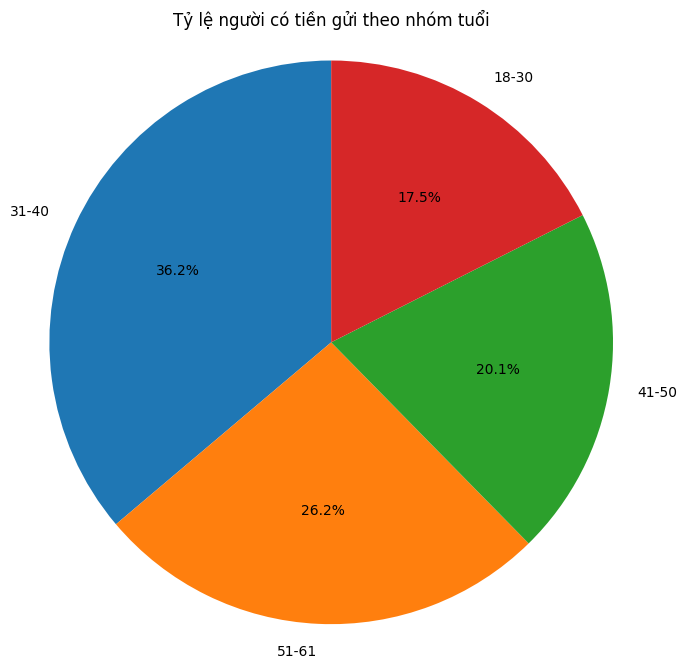

In [37]:
# Đầu tiên, lọc các người có độ tuổi trong các khoảng 18-30, 31-40, 41-50, 51-60, 60-61
# Chia độ tuổi thành các nhóm
bins = [18, 30, 40, 50, 100]
labels = ['18-30', '31-40', '41-50', '51-61']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Lọc dữ liệu cho những người có gửi tiền
deposit_data_age = df[df['deposit'] == 'yes']

# Tính số lượng và tỷ lệ % cho các nhóm độ tuổi
age_group_counts = deposit_data_age['age_group'].value_counts()
age_group_percent = (age_group_counts / age_group_counts.sum()) * 100

# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 8))
plt.pie(age_group_percent, labels=age_group_percent.index, autopct='%1.1f%%', startangle=90)
plt.title('Tỷ lệ người có tiền gửi theo nhóm tuổi')
plt.axis('equal')  # Đảm bảo rằng biểu đồ tròn được vẽ dưới dạng hình tròn với tỷ lệ kích thước trục bằng nhau, tránh việc kích thước trục không bằng nhau sẽ gây móp méo biểu đồ (hình elip)
plt.show()


Vì trong bộ dữ liệu cột age có giá trị trải dài từ 18 - 61 gây khó khăn trong quá trình phân tích nên chúng ta sẽ thực hiện chia độ tuổi thành các nhóm chính (18-30, 31-40, 41-50, 51-61), sau đó lập biểu đồ tròn so sánh tỷ lệ các nhóm độ tuổi này gửi tiền ra sao. Nhìn vào biểu đồ ta thấy:
1. Nhóm tuổi 18-30 chiếm tỷ lệ nhỏ nhất, chỉ khoảng 17.5%. Điều này có thể cho thấy người trẻ tuổi ít có xu hướng gửi tiền vào ngân hàng trong chiến dịch này.
2. Nhóm tuổi 31-40 chiếm tỷ lệ lớn nhất, khoảng 36.2%. Đây có thể là nhóm tuổi có mức thu nhập ổn định hơn, vì vậy họ có xu hướng gửi tiền nhiều hơn.
3. Nhóm tuổi 41-50 chiếm khoảng 20.1%, thể hiện một tỷ lệ khá ổn định, không quá cao cũng không quá thấp.
4. Nhóm tuổi 51-61 chiếm 26.2%, khá cao so với nhóm tuổi 18-30, có thể là do người ở độ tuổi này có nhu cầu tiết kiệm cao hơn cho tương lai.


In [38]:
# Xóa cột 'age'
df = df.drop(columns=['age'])

# Chuyển cột 'age_group' về vị trí đầu tiên
age_group = df.pop('age_group')  # Lấy cột 'age_group'
df.insert(0, 'age_group', age_group)  # Chèn cột 'age_group' vào vị trí đầu tiên

# Kiểm tra lại DataFrame sau khi thay đổi
df.head(10)

,age_group,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,51-61,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,51-61,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41-50,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,51-61,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,51-61,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,41-50,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
6,51-61,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
7,51-61,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
8,31-40,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
9,18-30,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes


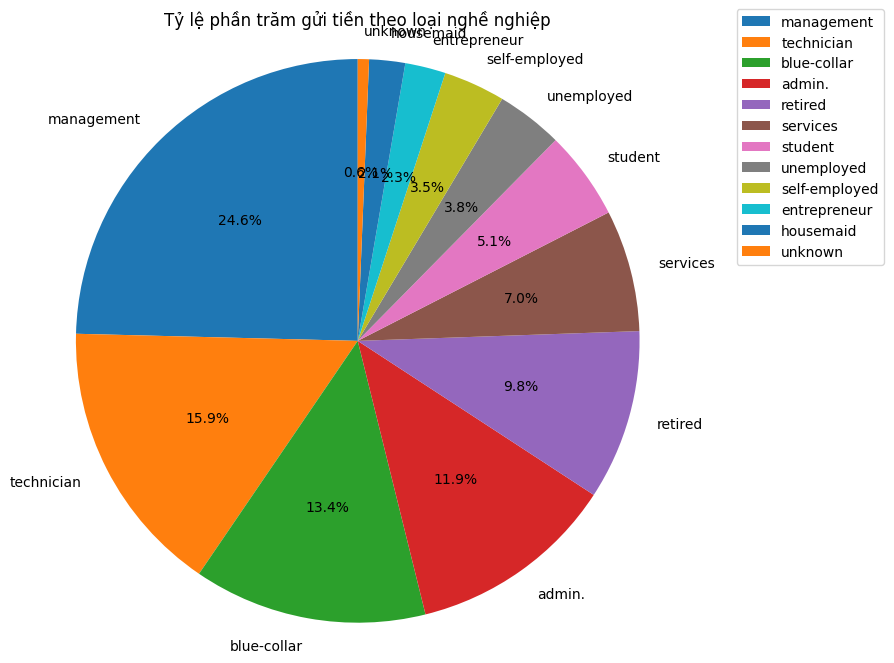

In [39]:
# Lọc dữ liệu để chỉ lấy các hàng có giá trị 'deposit' là 'yes'
deposit_data = df[df['deposit'] == 'yes']

# Đếm số lần xuất hiện của từng loại nghề nghiệp trong số những người đã gửi tiền
job_counts = deposit_data['job'].value_counts()

# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 8))
plt.pie(job_counts, labels=job_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Tỷ lệ phần trăm gửi tiền theo loại nghề nghiệp')
plt.axis('equal')  # Tỷ lệ kích thước trục bằng nhau đảm bảo rằng biểu đồ tròn được vẽ dưới dạng hình tròn
plt.legend(job_counts.index, bbox_to_anchor=(1.1, 1.05), loc='upper left')
plt.show()

Với cột job, ta nhận thấy tỉ lệ có gửi tiền ở các ngành nghề rất khác nhau và có sự chênh lệch lớn giữa nhiều ngành nghề, vậy nên chúng ta cần phải tiến hành phân loại các nhóm ngành nghề, sau đó xét lại tỷ lệ có gửi tiền của các nhóm phân loại mới. Cụ thể:
1. Với các nghề có tỉ lệ gửi tiền cao (xấp xỉ 10% trở lên) như retired, admin, blue-collar, technician, management sẽ giữ nguyên, không phân nhóm mới.
2. Với các nghề còn lại có tỉ lệ gửi tiền thấp, thực hiện phân nhóm mới như sau:
- Nhóm No Income (không có thu nhập): student, unemployed, unknown.
- Nhóm Unstable Income (thu nhập không ổn định): services, housemaid, entrepreneur, self-employed.

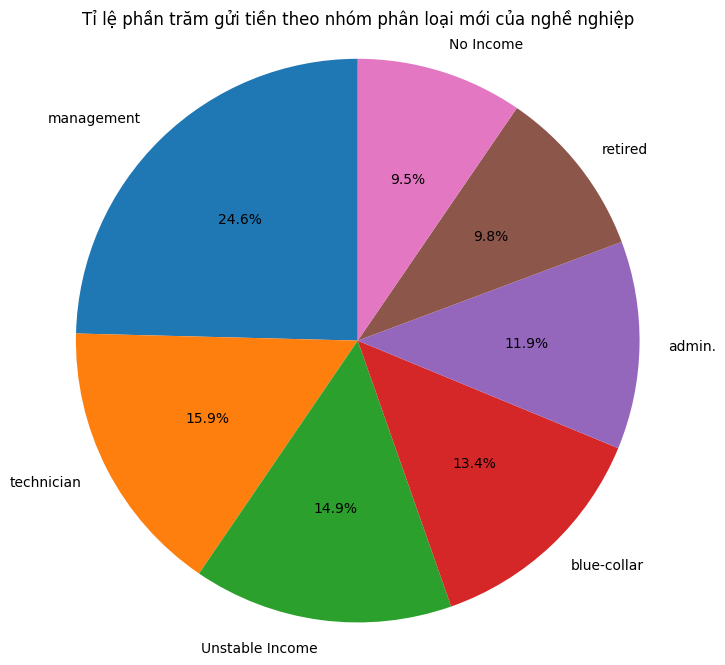

In [40]:
# Thực hiện thay đổi giá trị trong cột 'job'
df['job'] = df['job'].replace({
    'student': 'No Income',
    'unemployed': 'No Income',
    'unknown': 'No Income',
    'services': 'Unstable Income',
    'housemaid': 'Unstable Income',
    'entrepreneur': 'Unstable Income',
    'self-employed': 'Unstable Income'
})

# Lọc dữ liệu để chỉ lấy các hàng có giá trị 'deposit' là 'yes'
deposit_data = df[df['deposit'] == 'yes']

# Đếm số lần xuất hiện của từng loại nghề nghiệp trong số những người đã gửi tiền
job_counts = deposit_data['job'].value_counts()

# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 8))
plt.pie(job_counts, labels=job_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Tỉ lệ phần trăm gửi tiền theo nhóm phân loại mới của nghề nghiệp')
plt.axis('equal')
plt.show()

In [41]:
from datetime import datetime
df['month_number'] = df['month'].apply(lambda x: datetime.strptime(x, "%b").month)
df = df.drop(columns=['month'])
df = df.rename(columns={'month_number': 'month'})
# Lấy danh sách các cột hiện tại
columns = list(df.columns)
# Xóa cột 'month' khỏi vị trí cũ
columns.remove('month')
# Xác định vị trí của cột 'day'
day_index = columns.index('day')
# Chèn 'month' vào ngay sau 'day'
columns.insert(day_index + 1, 'month')
# Sắp xếp lại DataFrame theo thứ tự cột mới
df = df[columns]
# Xóa cột 'day'
df = df.drop(columns=['day'])
# Hiển thị Data sau khi thay đổi
print(df.head())

  age_group              job  marital  education default  balance housing  \
0     51-61           admin.  married  secondary      no     2343     yes   
1     51-61           admin.  married  secondary      no       45      no   
2     41-50       technician  married  secondary      no     1270     yes   
3     51-61  Unstable Income  married  secondary      no     2476     yes   
4     51-61           admin.  married   tertiary      no      184      no   

  loan  contact  month  duration  campaign  pdays  previous poutcome deposit  
0   no  unknown      5      1042         1     -1         0  unknown     yes  
1   no  unknown      5      1467         1     -1         0  unknown     yes  
2   no  unknown      5      1389         1     -1         0  unknown     yes  
3   no  unknown      5       579         1     -1         0  unknown     yes  
4   no  unknown      5       673         2     -1         0  unknown     yes  


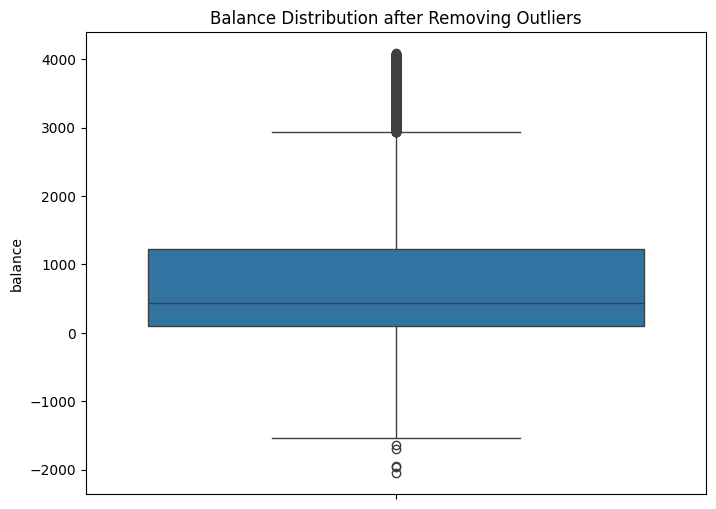

<ipython-input-42-c8200bedd3f8>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['balance'] = data_cleaned['balance'].clip(lower=0)


,balance
0,2343
1,45
2,1270
3,2476
4,184


In [42]:
# Xử lý các giá trị ngoại lai (outliers) bằng phương pháp IQR (Interquartile Range)
Q1 = df['balance'].quantile(0.25)
Q3 = df['balance'].quantile(0.75)
IQR = Q3 - Q1

# Xác định phạm vi hợp lý cho balance (không nằm ngoài 1.5*IQR)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Loại bỏ các giá trị ngoài phạm vi hợp lý
data_cleaned = df[(df['balance'] >= lower_bound) & (df['balance'] <= upper_bound)]

# Kiểm tra lại phân phối cột balance sau khi loại bỏ outliers
plt.figure(figsize=(8, 6))
sns.boxplot(data_cleaned['balance'])
plt.title('Balance Distribution after Removing Outliers')
plt.show()

# Kiểm tra xem có giá trị âm nào trong cột balance không
data_cleaned['balance'] = data_cleaned['balance'].clip(lower=0)

# Hiển thị một số giá trị đầu tiên sau khi xử lý
data_cleaned[['balance']].head()

Cột balance có giá trị trải dài từ -6847 đến 81204 nên cần đưa về phạm vi nhỏ hơn. Chúng ta sẽ sử dụng IQR để loại bỏ các giá trị ngoại lai sau đó vẽ biểu đồ hộp (boxplot) để kiểm tra. Nhìn vào biểu đồ ta thấy các giá trị nằm tập trung trong khoảng từ 0 đến hơn 1000, vẫn còn xuất hiện các giá trị ngoại lai nhưng đã giảm đáng kể và cũng thu hẹp khoảng giá trị so với ban đầu.

In [44]:
print(df.dtypes)

age_group    category
job            object
marital        object
education      object
default        object
balance         int64
housing        object
loan           object
contact        object
month           int64
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome       object
deposit        object
dtype: object


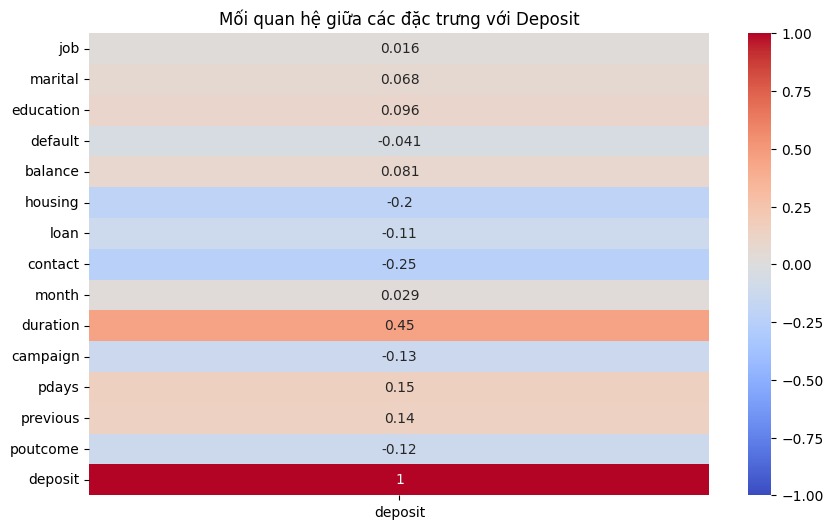

In [47]:
# Chuyển đổi dữ liệu phân loại thành các giá trị số để tính toán mối quan hệ
data_encoded = df.copy().drop(columns=['age_group'])

# Mã hóa các cột phân loại
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'deposit']
for column in categorical_columns:
    data_encoded[column] = data_encoded[column].astype('category').cat.codes

# Tính toán mối quan hệ giữa mỗi đặc trưng và 'deposit'
correlation_matrix = data_encoded.corr()

# Vẽ biểu đồ nhiệt thể hiện mối quan hệ với 'deposit'
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix[['deposit']], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Mối quan hệ giữa các đặc trưng với Deposit')
plt.show()

1. duration (0.45):
Đây là một trong những đặc trưng có mối quan hệ mạnh nhất với deposit. Tỷ lệ khách hàng gửi tiền có xu hướng tăng khi thời gian của cuộc gọi trong chiến dịch marketing càng dài. Điều này có thể giải thích rằng khách hàng càng dành nhiều thời gian để trao đổi với nhân viên tư vấn, họ càng có xu hướng đăng ký gửi tiền, cho thấy rằng thời gian trò chuyện dài có thể tạo sự tin tưởng và thuyết phục khách hàng.
2. balance (0.081):
Mối quan hệ giữa số dư tài khoản và việc gửi tiền là rất yếu. Điều này có thể phản ánh rằng số dư tài khoản không phải là yếu tố quyết định chính đối với việc khách hàng có gửi tiền hay không. Một số khách hàng có thể vẫn chọn gửi tiền mặc dù có số dư không quá cao.
3. job (0.016):
Nghề nghiệp của khách hàng không ảnh hưởng nhiều đến quyết định gửi tiền. Điều này có nghĩa là các yếu tố khác quan trọng hơn, ảnh hưởng nhiều hơn đến khả năng gửi tiền.
4. marital (0.068):
Tình trạng hôn nhân cũng không có ảnh hưởng lớn. Tuy nhiên, có thể có một số tác động phụ thuộc vào các yếu tố khác như thu nhập gia đình.
5. education (0.096):
Mối quan hệ này cho thấy trình độ học vấn cũng không phải là yếu tố quan trọng đối với quyết định gửi tiền.
6. default (-0.041):
Mối quan hệ âm cho thấy khách hàng có nợ xấu có khả năng gửi tiền thấp hơn. Đây là điều dễ hiểu vì khách hàng có nợ xấu có thể gặp khó khăn về tài chính và ít có khả năng tham gia các dịch vụ tài chính như gửi tiền.
7. housing (-0.2):
Mối quan hệ âm này chỉ ra rằng khách hàng đã có vay mua nhà có khả năng gửi tiền thấp hơn. Điều này có thể do họ đã có các khoản chi tiêu lớn như trả góp vay mua nhà, ảnh hưởng đến khả năng tiết kiệm.
8. loan (-0.11):
Mối quan hệ âm cho thấy khách hàng có vay cá nhân có xu hướng ít gửi tiền hơn. Cũng giống như vay mua nhà, các khoản vay cá nhân có thể làm giảm khả năng tiết kiệm của khách hàng.
9. contact (-0.25):
Cách thức liên lạc (cellular, telephone) có thể ảnh hưởng đến khả năng gửi tiền. Có thể những khách hàng được liên lạc qua các phương thức không trực tiếp hoặc không hiệu quả có thể ít tham gia gửi tiền.
10. month (0.029):
Mối quan hệ này gần như không có ảnh hưởng rõ rệt, cho thấy tháng liên hệ không phải là yếu tố quyết định đối với việc khách hàng gửi tiền.
11. pdays (0.15):
Mối quan hệ này cho thấy số ngày kể từ lần liên hệ trước có thể có ảnh hưởng nhỏ đến khả năng gửi tiền. Các khách hàng được liên hệ gần đây có thể dễ dàng tham gia vào chiến dịch gửi tiền hơn.
12. previous (0.14):
Tương tự như pdays, mối quan hệ này cho thấy rằng những khách hàng đã được liên hệ nhiều lần trong các chiến dịch trước đó có khả năng gửi tiền cao hơn.
13. outcome (-0.12):
Kết quả của các chiến dịch trước đó có thể ảnh hưởng tiêu cực đến khả năng gửi tiền của khách hàng.

In [48]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import RobustScaler
# Copy lại bộ dữ liệu df

# 1. Xử lý cột 'age_group' bằng Target Encoding (tính tỷ lệ gửi tiền trong từng nhóm tuổi)
# Giả sử cột 'deposit' là mục tiêu và chúng ta sẽ tính tỷ lệ gửi tiền trong mỗi nhóm tuổi
deposit_data_age = df[df['deposit'] == 'yes']

# Tính số lượng và tỷ lệ % cho các nhóm độ tuổi
age_group_counts = deposit_data_age['age_group'].value_counts()
age_group_percent = (age_group_counts / age_group_counts.sum())
df['age_group'] = df['age_group'].map(age_group_percent)


# 3. Xử lý cột 'balance' (sử dụng Log Transformation)
robust_scaler = RobustScaler()

# Áp dụng RobustScaler cho các cột số
df['balance'] = robust_scaler.fit_transform(df[['balance']])

# 4. Chuẩn hóa các cột số khác với MinMaxScaler
numeric_columns = ['duration', 'campaign', 'pdays', 'previous']
min_max_scaler = MinMaxScaler()
df[numeric_columns] = min_max_scaler.fit_transform(df[numeric_columns])

# 5. Đảm bảo cột 'pdays' có giá trị -1 được thay thế thành 0
df['pdays'] = df['pdays'].replace(-1, 0)

# 6. Kiểm tra kết quả
df.head()

,age_group,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,deposit
0,0.261864,admin.,married,secondary,no,1.130517,yes,no,unknown,5,0.268110,0.000000,0.0,0.0,unknown,yes
1,0.261864,admin.,married,secondary,no,-0.318411,no,no,unknown,5,0.377675,0.000000,0.0,0.0,unknown,yes
2,0.200983,technician,married,secondary,no,0.453972,yes,no,unknown,5,0.357566,0.000000,0.0,0.0,unknown,yes
3,0.261864,Unstable Income,married,secondary,no,1.214376,yes,no,unknown,5,0.148750,0.000000,0.0,0.0,unknown,yes
4,0.261864,admin.,married,tertiary,no,-0.230769,no,no,unknown,5,0.172983,0.016129,0.0,0.0,unknown,yes


In [49]:
# Mã hóa các cột 'default', 'housing', 'loan' thành 0 và 1
binary_columns = ['default', 'housing', 'loan','deposit']
df[binary_columns] = df[binary_columns].apply(lambda x: x.map({'yes': 1, 'no': 0}))


In [50]:
for col in df.select_dtypes(['bool']).columns:
    df[col] = df[col].astype(int)
# Kiểm tra lại dữ liệu sau khi mã hóa
df.head(10)

,age_group,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,deposit
0,0.261864,admin.,married,secondary,0,1.130517,1,0,unknown,5,0.268110,0.000000,0.0,0.0,unknown,1
1,0.261864,admin.,married,secondary,0,-0.318411,0,0,unknown,5,0.377675,0.000000,0.0,0.0,unknown,1
2,0.200983,technician,married,secondary,0,0.453972,1,0,unknown,5,0.357566,0.000000,0.0,0.0,unknown,1
3,0.261864,Unstable Income,married,secondary,0,1.214376,1,0,unknown,5,0.148750,0.000000,0.0,0.0,unknown,1
4,0.261864,admin.,married,tertiary,0,-0.230769,0,0,unknown,5,0.172983,0.016129,0.0,0.0,unknown,1
5,0.200983,management,single,tertiary,0,-0.346784,1,1,unknown,5,0.144367,0.016129,0.0,0.0,unknown,1
6,0.261864,management,married,tertiary,0,0.176545,1,1,unknown,5,0.309100,0.000000,0.0,0.0,unknown,1
7,0.261864,retired,divorced,secondary,0,-0.003153,1,0,unknown,5,0.265017,0.000000,0.0,0.0,unknown,1
8,0.361694,technician,married,secondary,0,-0.346154,1,0,unknown,5,0.156226,0.000000,0.0,0.0,unknown,1
9,0.175458,Unstable Income,single,secondary,0,2.862547,1,0,unknown,5,0.333849,0.032258,0.0,0.0,unknown,1


In [51]:
# Sử dụng One-Hot Encoding cho các cột phân loại
df = pd.get_dummies(df, columns=['job', 'marital', 'education', 'contact', 'poutcome'])
df.head(10)

,age_group,default,balance,housing,loan,month,duration,campaign,pdays,previous,...,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0.261864,0,1.130517,1,0,5,0.268110,0.000000,0.0,0.0,...,True,False,False,False,False,True,False,False,False,True
1,0.261864,0,-0.318411,0,0,5,0.377675,0.000000,0.0,0.0,...,True,False,False,False,False,True,False,False,False,True
2,0.200983,0,0.453972,1,0,5,0.357566,0.000000,0.0,0.0,...,True,False,False,False,False,True,False,False,False,True
3,0.261864,0,1.214376,1,0,5,0.148750,0.000000,0.0,0.0,...,True,False,False,False,False,True,False,False,False,True
4,0.261864,0,-0.230769,0,0,5,0.172983,0.016129,0.0,0.0,...,False,True,False,False,False,True,False,False,False,True
5,0.200983,0,-0.346784,1,1,5,0.144367,0.016129,0.0,0.0,...,False,True,False,False,False,True,False,False,False,True
6,0.261864,0,0.176545,1,1,5,0.309100,0.000000,0.0,0.0,...,False,True,False,False,False,True,False,False,False,True
7,0.261864,0,-0.003153,1,0,5,0.265017,0.000000,0.0,0.0,...,True,False,False,False,False,True,False,False,False,True
8,0.361694,0,-0.346154,1,0,5,0.156226,0.000000,0.0,0.0,...,True,False,False,False,False,True,False,False,False,True
9,0.175458,0,2.862547,1,0,5,0.333849,0.032258,0.0,0.0,...,True,False,False,False,False,True,False,False,False,True


In [52]:
for col in df.select_dtypes(['bool']).columns:
    df[col] = df[col].astype(int)